In [1]:
# ---- Mount Drive ---
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
base = "/content/drive/MyDrive/auto-imports-regression-eda"
clean_csv = f"{base}/data/auto_imports_clean.csv"

In [5]:
# --- Libraries ---
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm

In [8]:
# --- Load cleaned data ---
df2 = pd.read_csv(clean_csv)
y = df2['price'].to_numpy(dtype=float)

In [10]:
# --- Rebuild both models ---
X1 = sm.add_constant(df2.drop(columns=['price']).to_numpy(dtype=float))
m1 = sm.OLS(y, X1).fit()

In [12]:
drop_cols = ['city_mpg','highway_mpg','bore','wheel_base','length',
             'curb_weight','horse_power','comprassion']
X2 = sm.add_constant(df2.drop(columns=['price'] + drop_cols).to_numpy(dtype=float))
m2 = sm.OLS(y, X2).fit()

In [13]:
# --- ANOVA comparison ---
anova = sm.stats.anova_lm(m1, m2)
print("ANOVA Results:\n", anova)

ANOVA Results:
    df_resid           ssr  df_diff       ss_diff         F  Pr(>F)
0     180.0  1.764456e+09      0.0           NaN       NaN     NaN
1     188.0  1.913618e+09     -8.0 -1.491617e+08  1.831766     NaN


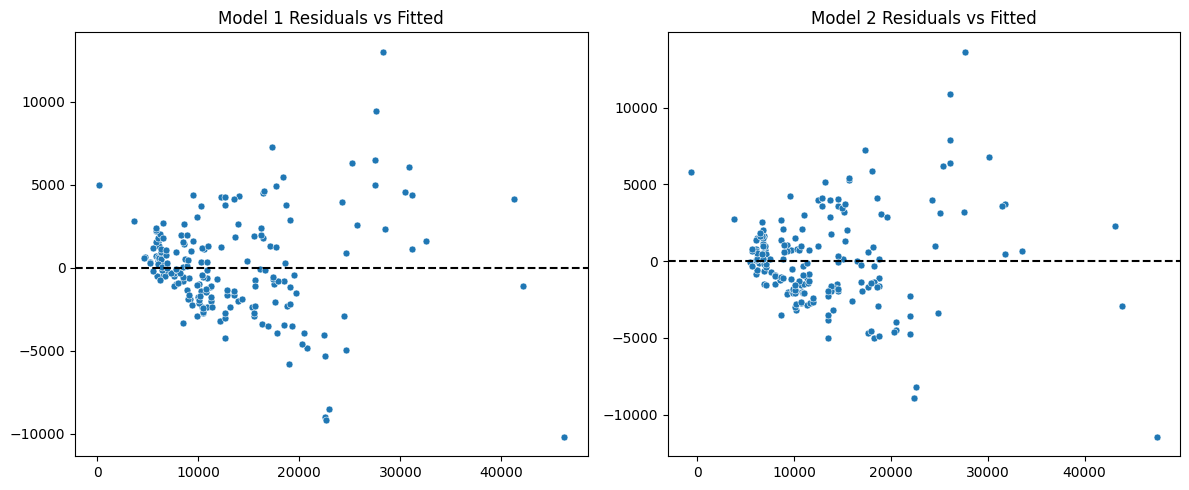

In [15]:
# --- Residual diagnostics ---
fig = plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.scatterplot(x=m1.fittedvalues, y=m1.resid, s=25)
plt.axhline(0, ls='--', c='k')
plt.title("Model 1 Residuals vs Fitted")

plt.subplot(1,2,2)
sns.scatterplot(x=m2.fittedvalues, y=m2.resid, s=25)
plt.axhline(0, ls='--', c='k')
plt.title("Model 2 Residuals vs Fitted")
plt.tight_layout()
plt.show()

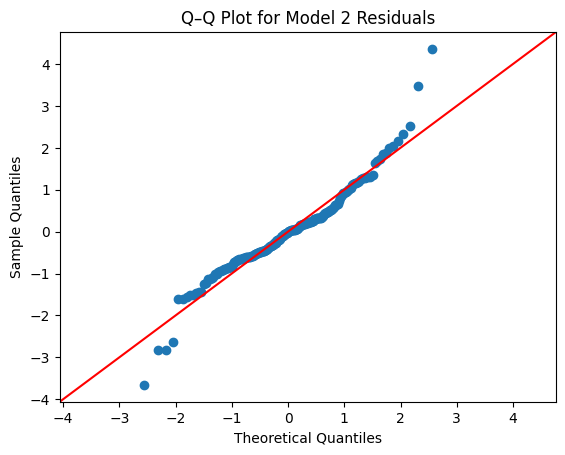

In [16]:
# Normal Q–Q plot
sm.qqplot(m2.resid, line='45', fit=True)
plt.title("Q–Q Plot for Model 2 Residuals")
plt.show()